## 1. import libraries ##

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc
import seaborn as sns
from sklearn.metrics import confusion_matrix

## 2. import data ##

In [2]:
boston = load_boston()
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df=pd.get_dummies(df,prefix="RAD")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
scaler=MinMaxScaler()
scaler = scaler.fit(df[["CRIM", "AGE", "DIS"]])
scaledData=scaler.transform(df[["CRIM", "AGE","DIS"]])
df_scaled = pd.DataFrame(scaledData, columns = ("CRIM", "AGE","DIS"))

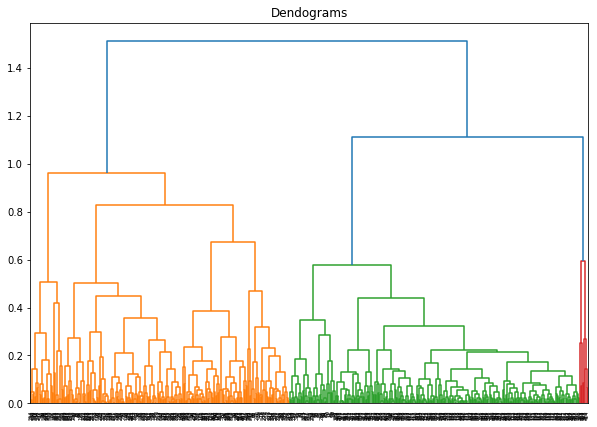

In [4]:
## using scipy cluster heirarchy raw dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(df_scaled, method='complete'))
# method 부분에 ward, single 등 입력 가능

In [5]:
Z = linkage(df_scaled, 'complete')
cluster = pd.DataFrame(fcluster(Z, 0.6, criterion = 'distance'))  #0.4 기준으로 수평선 그려서 그룹 설정
cluster.columns = ['cluster1']
result = pd.concat([df, cluster], axis=1)
result

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,cluster1
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,4
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,5
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,4
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,2
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,3
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,5
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,5
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,5


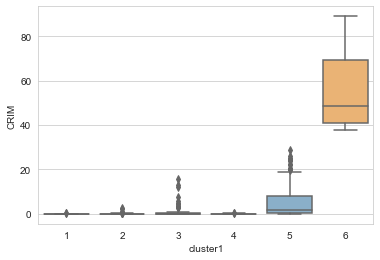

In [6]:
##각 그룹별 평균 & boxplot 보기 -> 각 그룹별 설명 & 시각화
result['cluster1'].value_counts()
sns.set_style("whitegrid")
ax = sns.boxplot(x="cluster1", y="CRIM", 
                 data=result, palette="Set3")
## 5,6그룹의 CRIM이 다른 그룹과 큰 차이가 있음

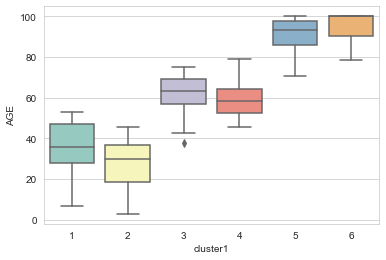

In [7]:
ax = sns.boxplot(x="cluster1", y="AGE", 
                 data=result, palette="Set3")
## AGE는 1,2그룹은 어리고 5,6그룹은 나이가 많음
## 이런식으로 각 그룹의 차이를 시각화 할 수 있음

In [8]:
## groupby를 통해 수치로 각 그룹간 비교하기
print(result.groupby('cluster1')['AGE'].mean())
print(result.groupby('cluster1')['CRIM'].mean())

cluster1
1    35.240000
2    27.733333
3    62.459322
4    58.465789
5    91.192776
6    94.500000
Name: AGE, dtype: float64
cluster1
1     0.077847
2     0.157526
3     1.473018
4     0.127844
5     4.838299
6    55.606988
Name: CRIM, dtype: float64


In [18]:
## 정답이 있는 데이터 confusion matrix로 정확도 보기 - by 이민성님
iris = sns.load_dataset('iris')
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping
from collections import Counter  # label별 데이터 카운트를 위한 모듈

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# 전처리 및 모델 성능평가 관련 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
####################################################################################

# scikit-learn 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공

from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.pipeline import *  # feature 처리 등의 변환과 ML 알고리즘 학습/예측 등을 함께 묶어서 실행하는 유틸리티 제공

#

In [19]:
y = iris.iloc[:, 4]
x = iris.iloc[:, 0:4]

def kmeans(k):
    cluster_kmeans = KMeans( n_clusters = k,
                             init = 'random',
                             max_iter = 500,
                             random_state = 0 )
    return cluster_kmeans

# k를 2개로 설정하고 군집 모델 학습
model = kmeans(3)

model.fit(x)

# 각각의 클러스터의 중심 확인
print('< centers >')
print(model.cluster_centers_)
print()

# 분류된 군집화 값 확인
print('< labels >')
print(model.labels_)
print()

< centers >
[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]

< labels >
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]



In [32]:
iris.loc[(iris.species=='setosa'),'species'] = 0
iris.loc[(iris.species=='versicolor'),'species'] = 1
iris.loc[(iris.species=='virginica'),'species'] = 2
iris['species'].value_counts()
iris['predict'] = model.labels_
df_confusion = pd.crosstab(iris['species'], iris['predict'])
df_confusion
# 정확도(Accuracy) : (50+48+36)/(50+48+36+2+14)
# 1그룹에 대한 정밀도(Precision) : 48 / (48+14)
# 1그룹에 대한 재현도(Recall) : 48 / (48 + 2)

predict,0,1,2
species,,,
0,50,0,0
1,0,48,2
2,0,14,36
